In [31]:
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bank-additional-full.csv",sep=";")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
df.shape

(41188, 21)

In [6]:
df.drop_duplicates().shape

(41176, 21)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(41176, 21)

In [9]:
df.rename({"y":"subscribed","pdays":"Past Contract","poutcome":"Past Outcome","default":"Has Credit Card Before"},axis=1,inplace=True)

In [10]:
df.head()

,age,job,marital,education,Has Credit Card Before,housing,loan,contact,month,day_of_week,...,campaign,Past Contract,previous,Past Outcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.columns

Index(['age', 'job', 'marital', 'education', 'Has Credit Card Before',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'Past Contract', 'previous', 'Past Outcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'subscribed'],
      dtype='object')

In [12]:
df.drop(['emp.var.rate','cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],axis=1,inplace=True)

In [13]:
df.head()

,age,job,marital,education,Has Credit Card Before,housing,loan,contact,month,day_of_week,duration,campaign,Past Contract,previous,Past Outcome,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [14]:
for col in df.columns:
    display(df[col].value_counts())
    print("-"*50)

age
31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: count, Length: 78, dtype: int64

--------------------------------------------------


job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

--------------------------------------------------


marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

--------------------------------------------------


education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64

--------------------------------------------------


Has Credit Card Before
no         32577
unknown     8596
yes            3
Name: count, dtype: int64

--------------------------------------------------


housing
yes        21571
no         18615
unknown      990
Name: count, dtype: int64

--------------------------------------------------


loan
no         33938
yes         6248
unknown      990
Name: count, dtype: int64

--------------------------------------------------


contact
cellular     26135
telephone    15041
Name: count, dtype: int64

--------------------------------------------------


month
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: count, dtype: int64

--------------------------------------------------


day_of_week
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: count, dtype: int64

--------------------------------------------------


duration
90      170
85      170
136     168
73      167
124     163
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: count, Length: 1544, dtype: int64

--------------------------------------------------


campaign
1     17634
2     10568
3      5340
4      2650
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: count, dtype: int64

--------------------------------------------------


Past Contract
999    39661
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: count, dtype: int64

--------------------------------------------------


previous
0    35551
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: count, dtype: int64

--------------------------------------------------


Past Outcome
nonexistent    35551
failure         4252
success         1373
Name: count, dtype: int64

--------------------------------------------------


subscribed
no     36537
yes     4639
Name: count, dtype: int64

--------------------------------------------------


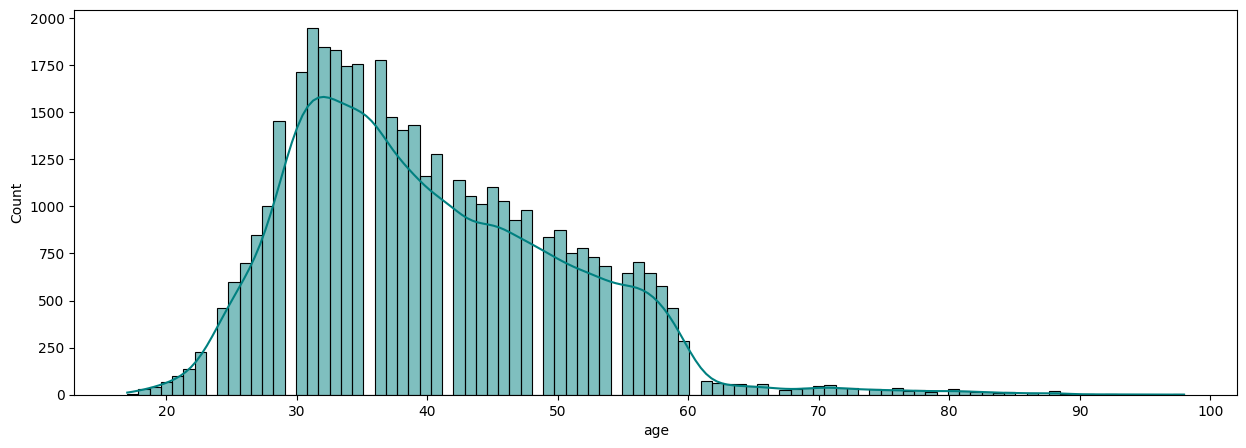

In [15]:
plt.figure(figsize=(15,5))
sns.histplot(df["age"],kde=True,color="teal")
plt.show()

In [16]:
df.head()

,age,job,marital,education,Has Credit Card Before,housing,loan,contact,month,day_of_week,duration,campaign,Past Contract,previous,Past Outcome,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [17]:
df.describe()

,age,duration,campaign,Past Contract,previous
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013
std,10.42068,259.305321,2.770318,186.937102,0.494964
min,17.00000,0.000000,1.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000


In [18]:
categorical_df = df.select_dtypes(exclude="number")

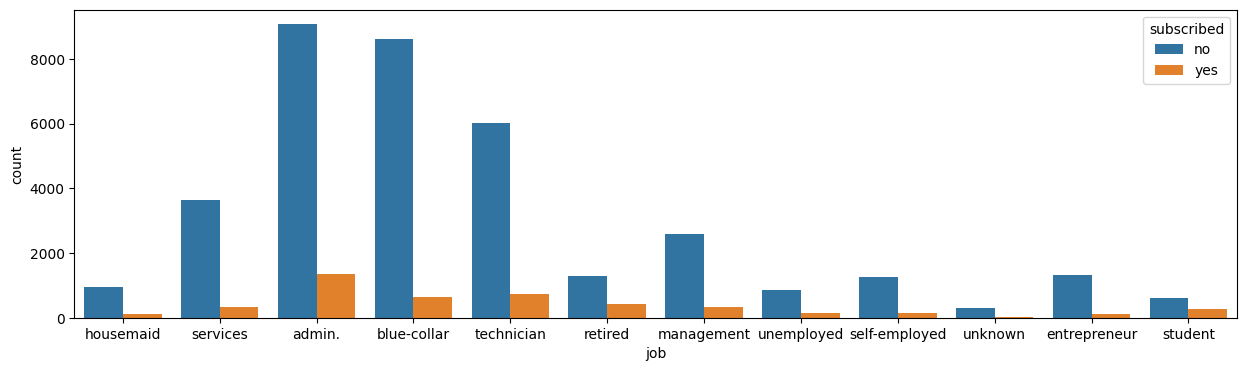

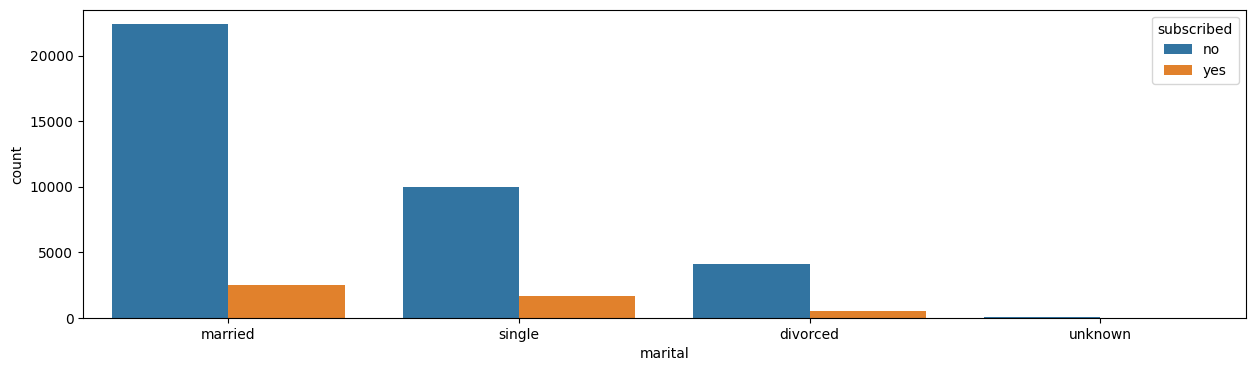

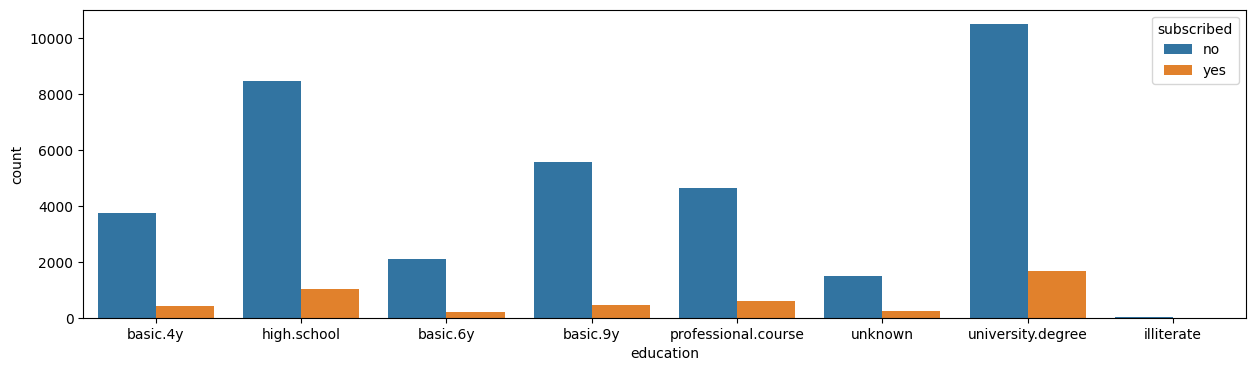

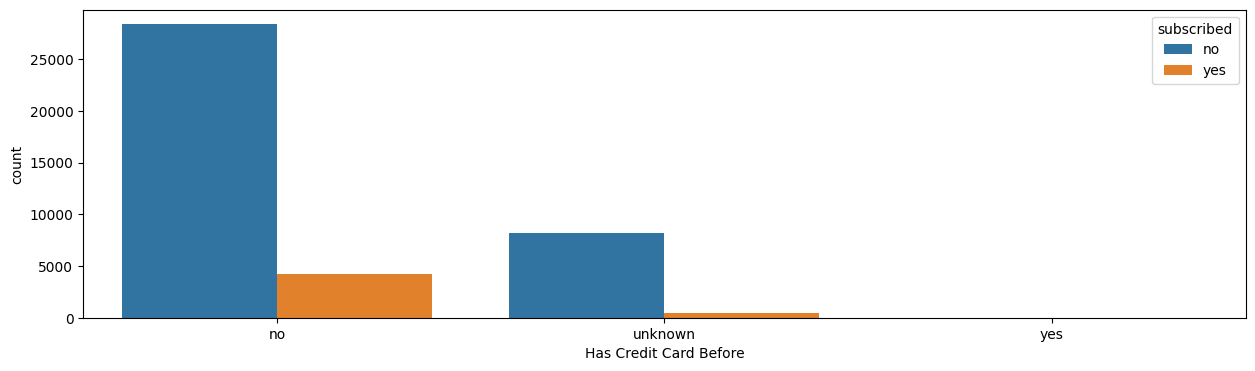

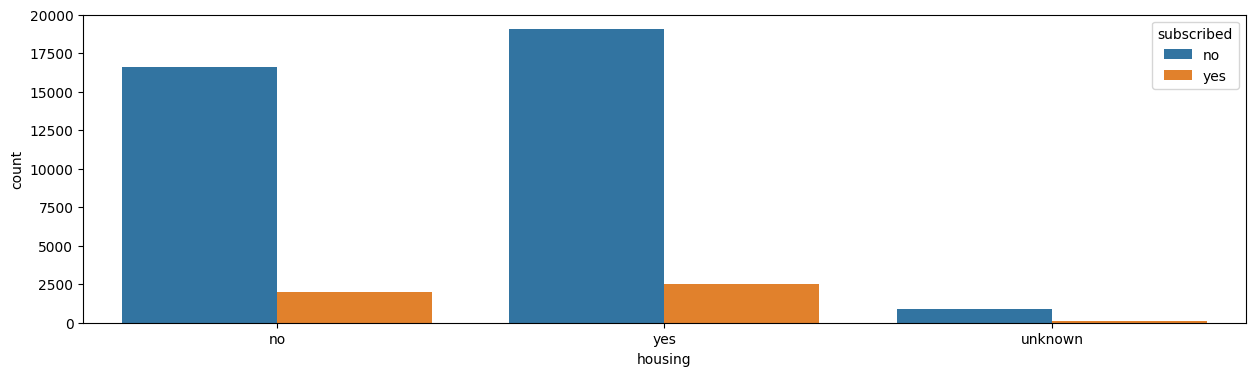

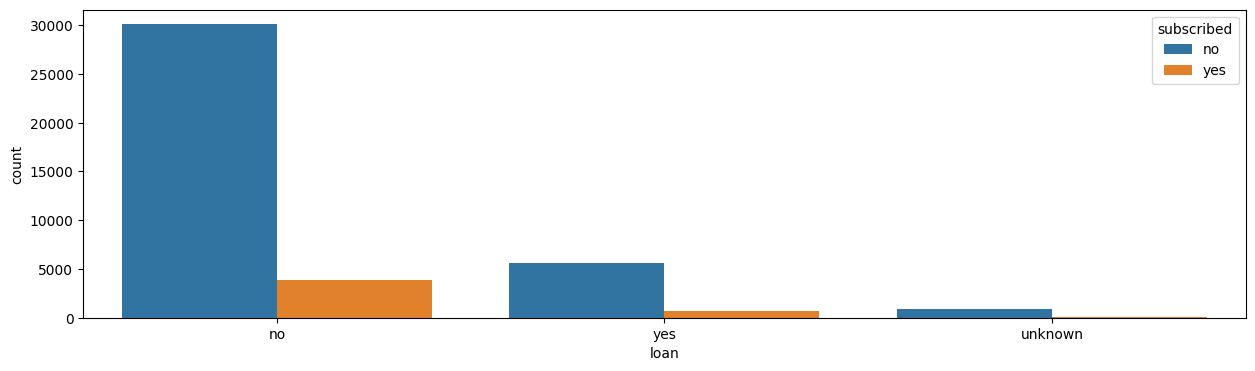

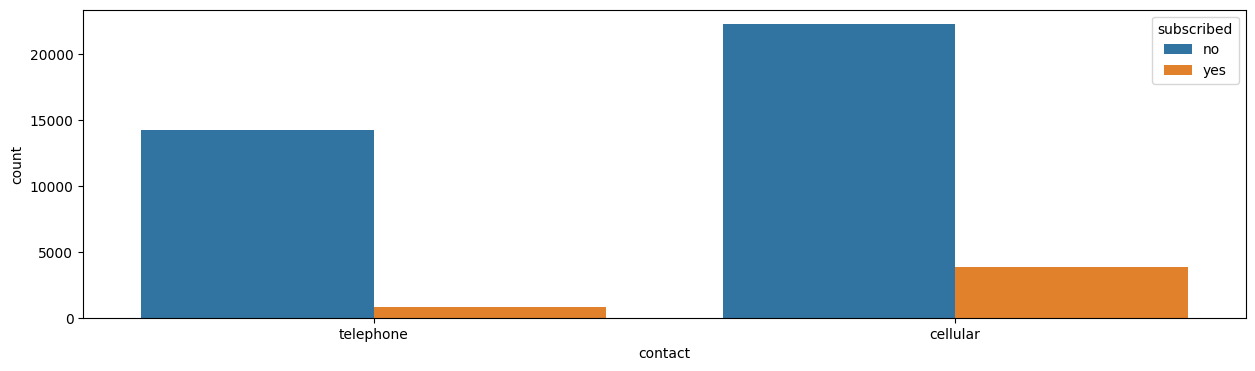

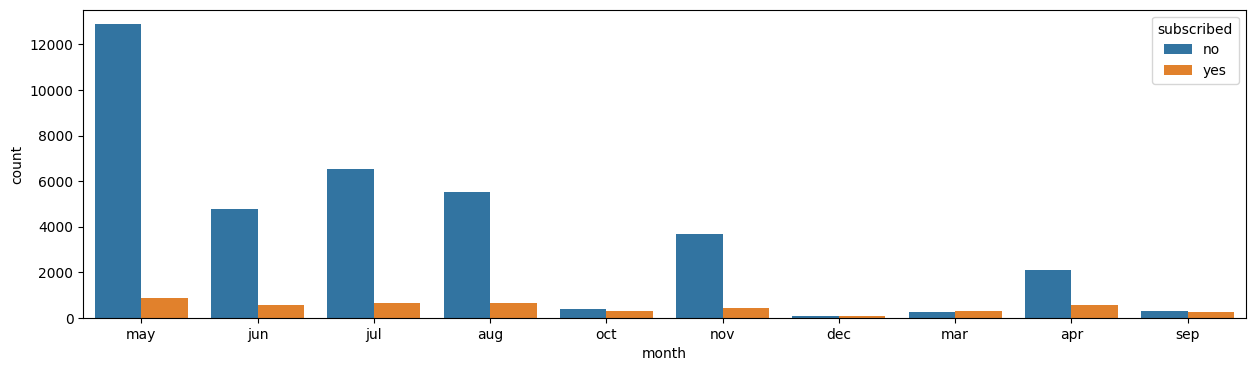

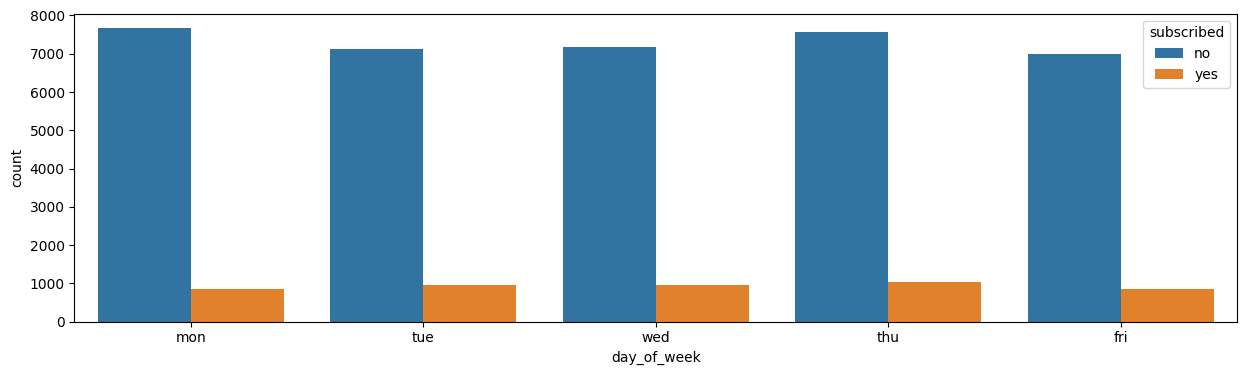

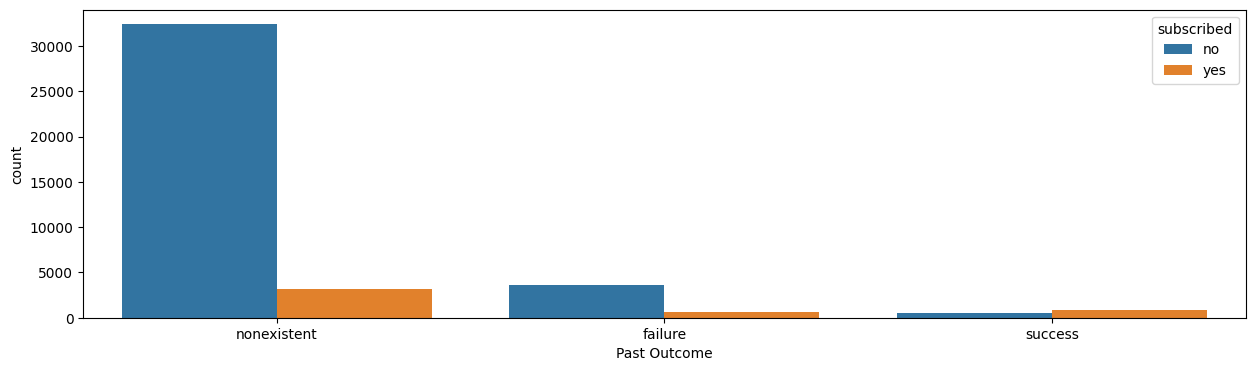

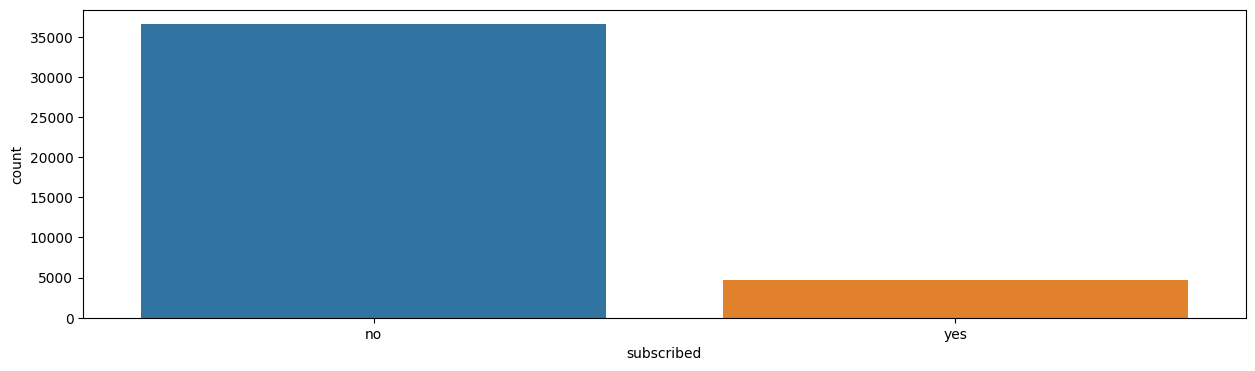

In [19]:
for col in categorical_df.columns:
    plt.figure(figsize=(15,4))
    sns.countplot(x=df[col],hue=df["subscribed"])
    plt.show()

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'Has Credit Card Before',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'Past Contract', 'previous', 'Past Outcome', 'subscribed'],
      dtype='object')

In [21]:
df.head()

,age,job,marital,education,Has Credit Card Before,housing,loan,contact,month,day_of_week,duration,campaign,Past Contract,previous,Past Outcome,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no


In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_df:
    df[col]= label_encoder.fit_transform(df[col])

In [24]:
df.head()

,age,job,marital,education,Has Credit Card Before,housing,loan,contact,month,day_of_week,duration,campaign,Past Contract,previous,Past Outcome,subscribed
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,0


In [27]:
X = df.drop("subscribed",axis=1)
y = df["subscribed"]

In [34]:
X = np.array(X)
y = np.array(y)

In [36]:
from sklearn.model_selection import StratifiedShuffleSplit


sss = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=45)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [37]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [38]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
from sklearn.metrics import accuracy_score,classification_report

In [41]:
pred = model.predict(X_test)
print(accuracy_score(y_test,pred)*100)

87.93957645230232


In [43]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     18268
           1       0.47      0.48      0.47      2320

    accuracy                           0.88     20588
   macro avg       0.70      0.71      0.70     20588
weighted avg       0.88      0.88      0.88     20588

